In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


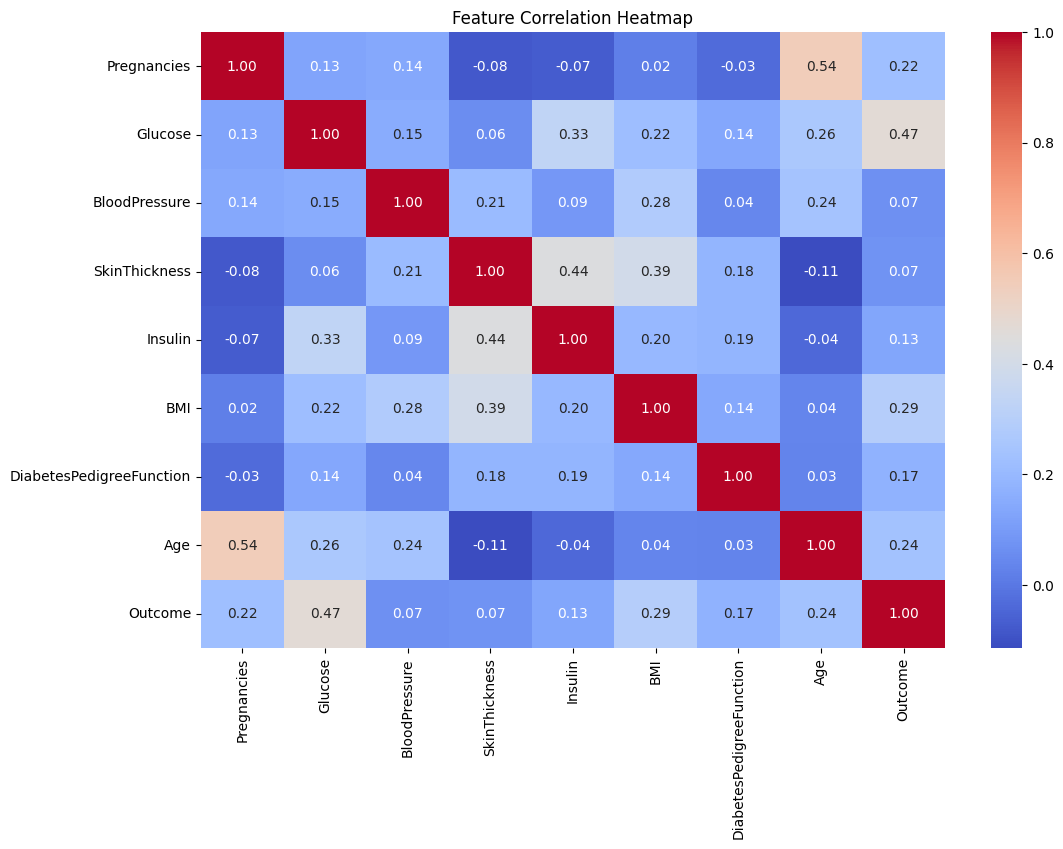

In [3]:
# Visualize the correlation between features
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Feature Correlation Heatmap')
plt.show()

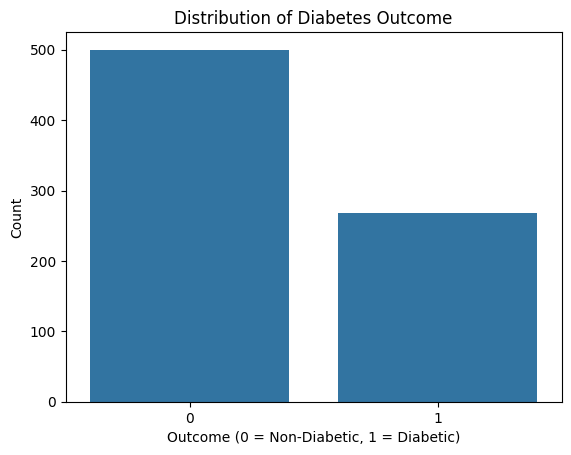

In [4]:
# Visualize the distribution of the target variable
sns.countplot(x='Outcome', data=data)
plt.title('Distribution of Diabetes Outcome')
plt.xlabel('Outcome (0 = Non-Diabetic, 1 = Diabetic)')
plt.ylabel('Count')
plt.show()

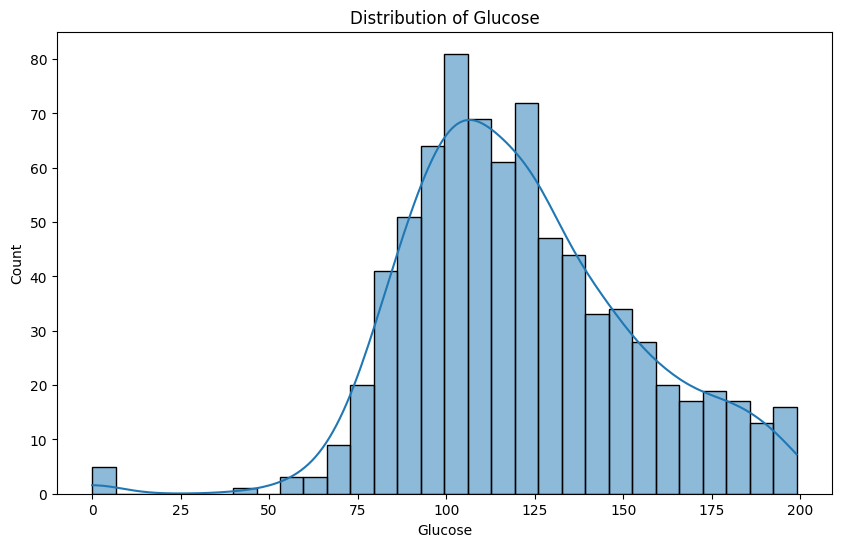

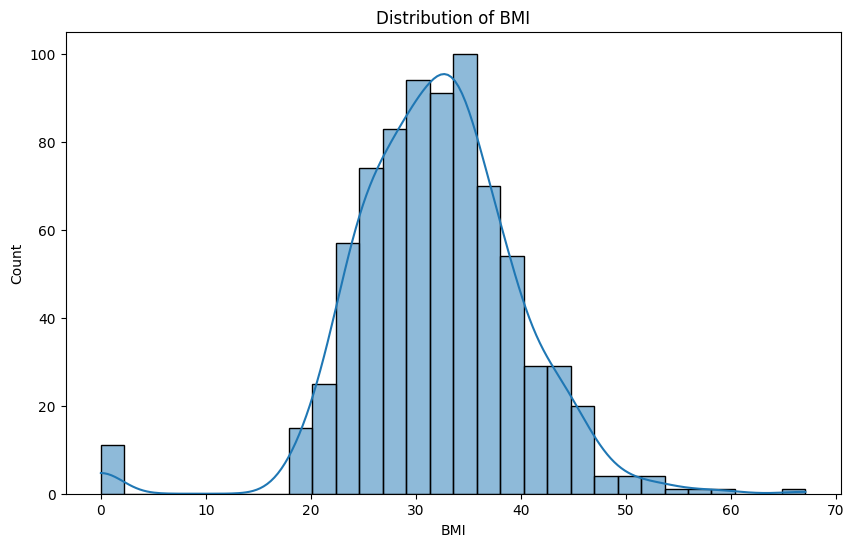

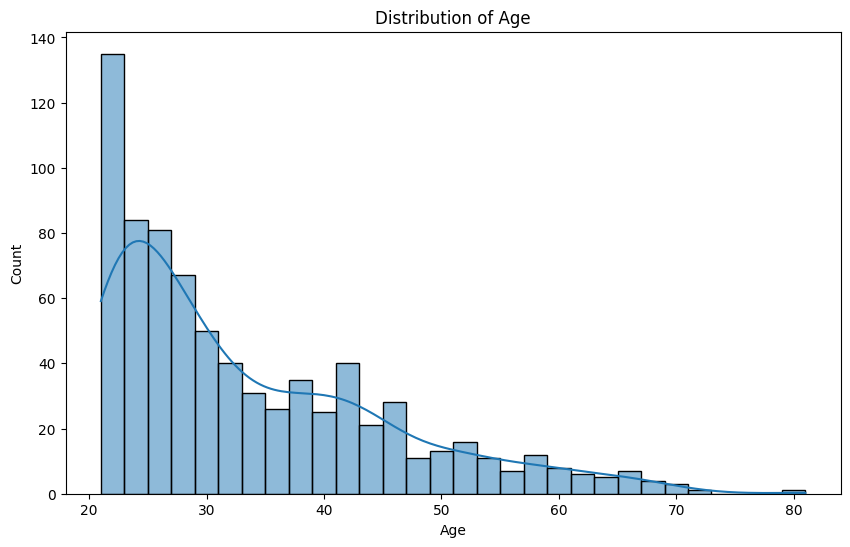

In [5]:
# Visualize the distribution of key features
for feature in ['Glucose', 'BMI', 'Age']:
    plt.figure(figsize=(10, 6))
    sns.histplot(data[feature], kde=True, bins=30)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(f'{feature}')
    plt.ylabel('Count')
    plt.show()

In [6]:
data.isnull().sum() #check to see if any value is null or not

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
##Segregate the dependent and independent variable
X = data.drop(columns=['Outcome'])
Y = data['Outcome']

In [8]:
# Split the data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=42)

In [9]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [10]:
model = LogisticRegression(max_iter=1000)

# Train the model on the training data
model.fit(X_train_scaled, Y_train)

LogisticRegression(max_iter=1000)

In [11]:
# Predict the outcomes on the test data
Y_pred = model.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(Y_test, Y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.71


In [13]:
# Function to take user input for prediction, line by line
def get_user_input():
    input_data = []
    for feature in X.columns:
        value = float(input(f"Enter value for {feature}: "))
        input_data.append(value)
    return np.asarray(input_data).reshape(1, -1)

# Get user input
user_input = get_user_input()

# Scale the input data (using the same scaler used for training data)
user_input_scaled = scaler.transform(user_input)

# Make a prediction
prediction = model.predict(user_input_scaled)

# Output the prediction result
if prediction[0] == 0:
    print('Based on given input the system predicted that the patient might NOT have Diabetes.')
else:
    print('Based on given input the system predicted that the patient might HAVE Diabetes. Consult your Doctor/Physician immediately !!!')

Enter value for Pregnancies: 0
Enter value for Glucose: 122
Enter value for BloodPressure: 80
Enter value for SkinThickness: 2
Enter value for Insulin: 22
Enter value for BMI: 23
Enter value for DiabetesPedigreeFunction: 23
Enter value for Age: 47


C:\Users\faiza\.conda\envs\tf\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Based on given input the system predicted that the patient might HAVE Diabetes. Consult your Doctor/Physician immediately !!!
